## Part 1: Executive Summary
This is a summary of the modelling task assigned to me by the Manager on the 16th of November, 2022 on predicting or classifying our customer’s salaries based on their age, how long they interacted with our website, how much they spent, the level of satisfaction they had, level of education, the sector of the economy they work in and their gender. Differenting machine learning models are implemented to see which will yield a better prediction, classification, clustering.

This task was done by through reseaching 15 published papers in various machine learning models, 7 of which were later discarded.

A peek into the data shows that we are modelling salaries of 1000 adults, 504 Female, 496 Males, ranging from about £12,000 to about £230,000. After experimenting with various machine learning algorithms on the dataset with different features as included, I have come to conclude that the traditional classification model, using `Random Forest Classifier` of the `sklearn.ensemble` module, best classified how much our customers could be earning based on 40,000 threshold to an accuracy of 95%.

<!--  -->

## Part 2: Introduction to Machine Learning
Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.([IBM](https://www.ibm.com/topics/machine-learning)). It explores the powerful combination of Mathematics and Statistics. It does this by finding patterns or structure in a data and fitting the data into models that can be interpreted by humans. Finding patterns is done by feeding the model with sample data called `training data` and predictions are made based on `test data`. The training data is called `labelled data`, while the test data is called `unlabelled data`. Models perfomance are scored based on some metrics like $R^2 score$, `Confusion Matrix` etc.

<br><b><u>Machine Learning Steps</u></b></br>

Machine learning has a typical template for walkthrough. There are 7 majors steps:
1. Data Gathering - This involves collection of data from different sources. After this is preparation.
2. Data Preparation - This step ensures data is clean, normalised or rescaled (if needed), and then we select model.
3. Model Selection - This is where we choose a model to solve our task. After choosing a model, we proceed to training.
4. Model Training - Models are train to find patterns in our data. After this comes evaluation.
5. Model Evaluation - Evaluation is done to know how well our model performed.
6. Parameter Tuning - This is done to improve our model performance.
7. Prediction - Once we are satisfied with our evaluation metrics, we predict outcome with new data.


<br><u><b>Types of Machine Learning</b></u></br>
There are three broad models, also termed algorithms or estimations, in machine learning – `Supervised Learning`, `Unsupervised Learning` and `Reinforcement Learning`. These are summarised below:
1. `Supervised Machine Learning`: This is the type in which an algorithm is made to learn by feeding it a dataset with a target, called label. Example include linear and logistic regressions from the `linear model` modlue of `sklearn` library.

2. `Unsupervised Learning`: In this algorithm, dataset is provided but without a label. A good example of this is grouping object of common features together using `clustering` from `cluster` module of `sklearn` library.
3. `Reinforcement Learning`: In this type, the algorithm finds a pattern in the dataset using trial and error method, gets corrected by a signal (feedback) from its environment to reach the set goal. A model that is very similar to human behaviour. A good example is the [Tic-Tac-Toe Game on Google](https://www.google.com/search?q=tic-tac-toe&oq=tic-&aqs=chrome.1.69i57j0i512l2j46i175i199i512j46i512j0i512l4j0i10i512.3608j0j4&sourceid=chrome&ie=UTF-8#cobssid=s).

Another type of machine learning worth mentioning is the `Semi-Supervised Learning`. It is partly supervised because a label is provided but it has some missing values so it will learn to estimate these values instead of excluding them.


<br></br>

<u>**Tasks to Test Various Machine Learning Models to Predict or Classify Customers Based on Salary**</u>

The following sections highlight the various models experimented with to arrive at my conclusion.
The models used are traditional linear regression, binary classification, Neural Networks, and clustering.
Libraries used to complete this task include:
1. [Numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) - for handing numerical data
2. [Pandas](https://pandas.pydata.org/) - for data analysis and manipulation
3. [Matplotlib](https://matplotlib.org/stable/tutorials/index.html) - for visualization
4. [Scikit-learn](https://scikit-learn.org/stable/) for traditional machine learning models
5. [Tensorflow](https://www.tensorflow.org/) - for Artifical Neural Network

<!--  -->

### Sections 3 - 6: model building:
- [Regression](#part-3---linear-regression)
- [Classification](#part-4-–-binary-classification)
- [Neural Network](#part-5-–-neural-networks)
- [K-Means Clustering](#part-6---kmeans)

### Section 7: Conclusion:
- [Conclusion](#part-7---conclusion)

Importing global libaries for the remaining tasks

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

plt.style.use("ggplot")
%matplotlib inline

## Part 3 - [Linear Regression](#sections-3---6-model-building)

Here, I am going to build a linear model to see how well it will predict the salaries of visitors to our website. I will be using `Polynomial Regression` preferreably as the multivariate features seem to be of polynomial nature.

So the following libraries will be used:

    1. numpy - for array/numerical manipulation
    2. matplotlib - for visualisation
    3. pandas - for data analysis
    4. scikit-learn (sklearn) - for building linear model

In [72]:
# import io
# from google.colab import files
# uploaded = files.upload()
# dataset = pd.read_csv(io.BytesIO(uploaded["Comp1801CourseworkDataResit.csv"]))
# dataset.head() # confrim dataframing

#import the dataset using pandas and display the first five rows to see the features the data is made of

dataset = pd.read_csv("Comp1801CourseworkDataResit.csv")
dataset.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,28,1986.92,70,3,A Level,Private sector,Male,Scotland,27447.26
1,34,4243.54,214,11,PhD,Private sector,Male,Yorkshire and The Humber,120044.00
2,51,3160.61,220,6,PhD,Private sector,Male,East of England,53133.79
3,27,1382.38,47,0,A Level,Private sector,Male,East of England,21874.01
4,24,1369.44,63,3,PhD,Unemployed,Female,North West,21222.03


From the table above, the features contain discrete and categorical features. This means we will implementing some preprocessing tasks of converting these categorical features to numerical values. These will be achieved with `LableEncoding`, `OneHotEncoding` (both from `sklearn.preprocessing` module), and `get_dummies` from `pandas` module. The table also show that some features have higher values than others. This will affect our models as well as visualizations. Therefore, I will be implementing `Feature Scaling`, preferably `Normalization`.
Next we split the dataset into training and testing data.

The linear model was pre-processed with `PolynomialRegression` of degree 4, using 4 numerical features (Age, SiteSpending, SiteTime, and RecommendImpression) only. The ordinary, multi-feature linear regression have performance of 74%. Hence, the need to experiment further with polynomial features.
as using less features gave a prediction score below 50% and other features are categorical.
The metric of performance employed is the Coefficient of Determination $R^2$, `r2_score`.
The following linear models were tested to predict accurately out test data:
1.  **LinearRegression** - Linear regression model predicted test data with an score of 82% while maintaining default regularizer and other default parameters

    as these values gave very close accuracies with changed parameters.
2. **Ridge model** - The Ridge regression model performed better than the Linear Regression model as it predicted the lablled data with an score of 89.64%.

    This score was achieved by increasing the number of iterations parameter (`max_iter`) to 10000 and changing the solver parameter to
    'svd', as against the default 'auto'.
3. **Lasso Model** - This linear model further improved the score to 89.93% with set parameter of maximum iterations=10000 only. This is the highest score measured among the three models.


r2_score: 89.93%


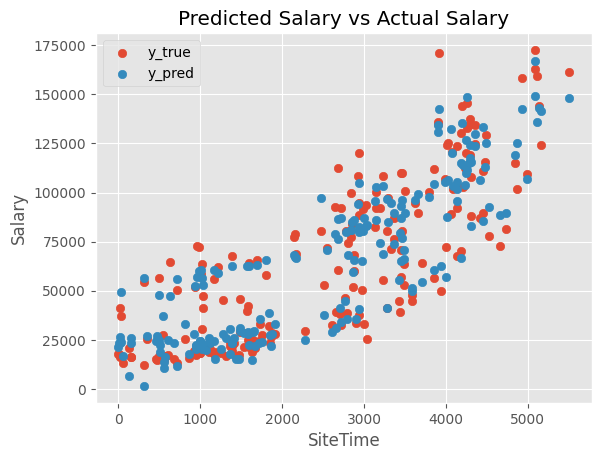

Fig. showing the predicted (blue) and the actual (red) salary, comparing salary to site time


In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import warnings
warnings.filterwarnings('ignore')


# create feature matrix with SiteSpending and SiteTime. Other features are either objects or categorically numerical
X = dataset.iloc[:, :4]
y = dataset["Salary"]
categorical_features = dataset.axes[1].values

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Create a polynomial model instance and initiate with a hyperparameter of the 4th degree.
# Various hyperparameters were used ot tune the model but 4 gave the best result.
poly = PolynomialFeatures(degree=4)

# fit the train and test subsets with poly
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# create and instance of linear regression for final modelling
lin_model = Lasso(max_iter=10000)



lin_model.fit(X_train_poly, y_train)

y_pred_poly = lin_model.predict(X_test_poly)

# print the score
print(f"r2_score: {r2_score(y_test, y_pred_poly)*100:.2f}%")
# print(f"MSLE: {mean_squared_logarithmic_error(y_pred_poly, y_test)}")


# Visualise the feature predictions against predicted and test salaries
fig, ax = plt.subplots()
n = 2
if n < 4:
        ax.scatter(X_test_poly[:, n], y_test, label="y_true")
        ax.scatter(X_test_poly[:, n], y_pred_poly, label="y_pred")
        # ax.scatter(np.linspace(min(X_test_poly[:,2]), max(X_test_poly[:,2]), len(X_test_poly[:,2])), y_pred_poly, label="Poly")
        ax.set(title="Predicted Salary vs Actual Salary",
                xlabel=categorical_features[n],
                ylabel="Salary")
        ax.legend()

        plt.show()
else:
        print(f"feature {categorical_features[n]} not included")

print("Fig. showing the predicted (blue) and the actual (red) salary, comparing salary to site time")

After experimenting with different linear models -Linear Rigression, Rigde and Lasso Models, and different hyperparameters (number of iteraions, tol etc), the best linear model to predict the salaries of the visitors to our website is the `Lasso Model` with a score of 90%. This was achived by adding polynonial features to our data.

<!--  -->

### Part 4 – [Binary Classification](#sections-3---6-model-building)

The model classifies outcomes based on true and false or 1 and 0. This model will be applied to customers who earn either above or below £40,000. The following four models were experimented with in order to come up with an accurate classification:
* `Logistic Regression` - The model had an accuracy of 92.5%
* <b>`Random Forest Classifier`</b> - with n_estimator hyperparameter set to 120, model had an accuracy of 95%.
* `Random Forest Regressor` - Model had an accuracy of 83%
* `Support Vector Machine (`svm`)` - SVC was model was fine tuned with different kernels. The following were the outcomes:
    * rbf: 91.5%
    * `linear: 93.5%`
    * poly: 91%
    * sigmoid: 92%

Of these, `Random Forest Classifier` was chosen over others as it gave a `Classification Accuracy of 95%`.

<u>Observations</u>

1. Increasing the hyperparameter, `max_iter`, slightly improved accuracy for all models.
2. Accuracy also improved to 95% as from 94% accuracy by encoding categorical variables. This means we have more features to work with.

<br></br>

<u>Libraries Used</u>
1. numpy - for array/numerical manipulation
2. matplotlib - for visualisation
3. pandas - for data framing
4. scikit-learn (sklearn) - for building classification model, splitting and scaling data

In [4]:
#import modules for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # to encode the categorical features 
from sklearn.compose import ColumnTransformer # to tranforme oneHotencoder

# import classification models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC

# create a pandas dataframe of the data
clf_dataset = pd.read_csv("Comp1801CourseworkDataResit.csv")

# Create a new column of truth table. This will be used as our classification target.
clf_dataset["Above40k"] = clf_dataset["Salary"] > 40000


clf_X = clf_dataset.drop(["Salary", "Above40k"], axis=1) # create drop the salary feature
clf_y = clf_dataset["Above40k"]

categorical_features = clf_X.axes[1].values  

# Create a `OneHotEncoder` and a `ColumnTransformer` intances to convert the ordered categorical features
# ("Education", "Sex") to numerical values.
clf_X["Education"] = LabelEncoder().fit_transform(clf_X["Education"])
clf_X["Sex"] = LabelEncoder().fit_transform(clf_X["Sex"])

# Use get_dummies method from pandas to encode WorkType and Region features and
# drop first column per feature to avoid the dummy variable trap
clf_X = pd.get_dummies(clf_X, columns=["WorkType", "Region"], drop_first=True) 

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(clf_X, clf_y, test_size=0.2)

# Normalize data using standard scaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

log_reg = RandomForestClassifier(n_estimators=120) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = log_reg.score(X_test, y_test)
print(f"\n{log_reg.__class__.__name__} Accuracy: {accuracy * 100:.2f}%")


RandomForestClassifier Accuracy: 95.00%


#### Visualizing our classification task

Data visualization grants us the benefit of displying our data graphically so we can better relate with the data and visualize patterns, if any.

For now, I'll want to visualize how the customers' salaries distribute below and above 40k.

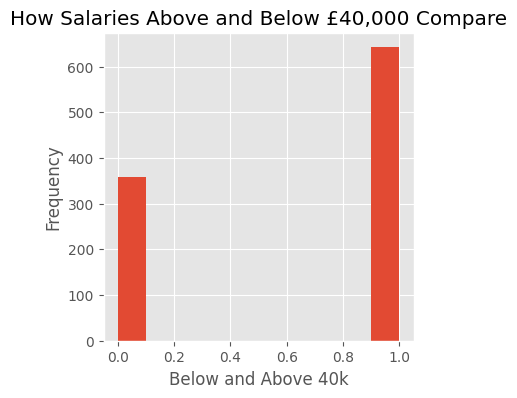

The plot shows we have more customers who earn above 40k (642) than below (358). This shows a 64% to 36% balancing, and,
hence good enough for classification task.
This could mean that our website may be most suited for customers who earn above minimum wage.


In [8]:
fig, ax40k = plt.subplots(figsize=(4,4))
ax40k.hist((clf_y).astype(int))
ax40k.set(title="How Salaries Above and Below £40,000 Compare",
          ylabel="Frequency",
          xlabel="Below and Above 40k")
plt.show()
print("The plot shows we have more customers who earn above 40k (642) than below (358). This shows a 64% to 36% balancing, and,\
\nhence good enough for classification task.\nThis could mean that our website may be most suited for\
 customers who earn above minimum wage.")

### Confustion Matrix

Confustion Matrix evaluates the accuracy of our classification model. It has the class `confusion_matrix` from the `sklearn.metrics` package. It returns a $2$ $X$ $2$ matrix:
$$
\begin{bmatrix} TP & FP \\ FN & TN \end{bmatrix}
$$


The confustion matrix is a table used to classify the performance of a classification algorithm on a labelled data. The matrix returns a table of Trues/Positives and Falses/Negatives classifications. The columns presents the instances of the `predicted` class while the rows are for the instances of the `actual` class. For a `Binary Classification`, there are four possible classifications:

1. **True Positive (TP)**: A test result that correctly indicates the presence of a condition or characteristic.

2. **True Negative (TN)**: A test result that correctly indicates the absence of a condition or characteristic.

3. **False Positive (FP)**: A test result which wrongly indicates that a particular condition or attribute is present. This is a `Type I Error`.

4. **False Negative (FN)**: A test result which wrongly indicates that a particular condition or attribute is absent. This is a `Type II Error`.

Mathematically, classification accuracy is calculated:

$$
Accuracy = \frac{TP + TN}{P + N}
$$

That is, accuracy is the ratio of the sum of true positive and true negative outcomes to sum of positive and negative observations.






Confusion matrix:  [[0.35 0.03]
 [0.02 0.6 ]]


RandomForestClassifier Report for given dataset
               precision    recall  f1-score   support

       False       0.95      0.92      0.93        76
        True       0.95      0.97      0.96       124

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200

**********************
Confusion Matrix Map


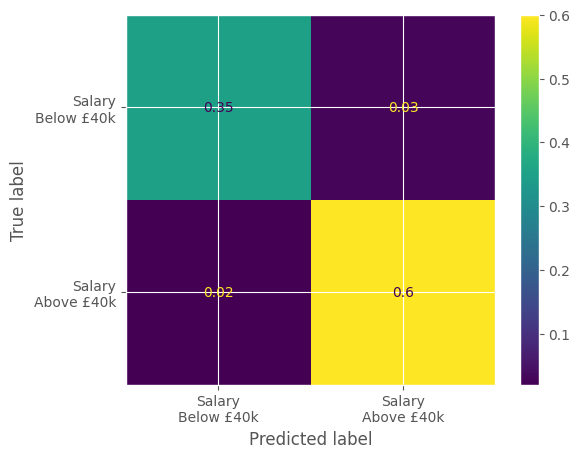

In [193]:
# Create an instance of confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred, normalize="all")
print("\nConfusion matrix: ", confusion_mat)

print()

# The classification report, which contains accuracy, precision, recall, F1 score
print(f"\n{log_reg.__class__.__name__} Report for given dataset\n {classification_report(y_test, y_pred)}")


print("**********************\nConfusion Matrix Map")

ConfusionMatrixDisplay(confusion_mat, display_labels=["Salary\nBelow £40k", "Salary\nAbove £40k"]).plot();

**Recall**: This tells us the number of positive outcomes we are able to predict with our model. Formula is:
$$
Recall = \frac{TP}{TP + FN}
$$



**Precision**: This metric tells us how many positives are correctly predicted as compared with actual positives. 

$$
precision = \frac{TP}{TP + FP}
$$



**F1-Score**: This is the harmonic mean of precision and recall:
$$
f1-score = \frac{2}{\frac{1}{recall} + \frac{1}{precision}}
$$

From the confusion matrix above, it is seen the the `True` values (positive and negative) are very much higher than the `False` values.
The classification map shows that out of the 95% accuracy, 35% were earned below £40k, while 60% earned above £40k.

##

### Part 5 – [Neural Networks](#sections-3---6-model-building)
To design and train a Neural Network to solve the same linear regression problem solved in [Part 3 – Linear Regression](#part-3---linear-regression)

##### <u>Neural Network Brief</u>
A neural network (also called an artificial neural network) is an adaptive system that learns by using interconnected nodes or neurons in a layered structure that resembles a human brain. A neural network can learn from data—so it can be trained to recognize patterns, classify data, and forecast future events.

The network has three braod layers - the `input layer`, the `hidden layer` and the `output` layer. Each layer is made of `nodes` with one input per node and one or more outputs per node.

<img src=https://miro.medium.com/max/1100/1*bhFifratH9DjKqMBTeQG5A.gif width="45%"/>

Image credit: [Towards Data Science](https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a)


Any particular node is takes an takes features,multipied by their weight vector, add a bias vector. This combination is passed to an activator function to produce an output. The equation is shown below:

$$
{{a}^{{out}}}^\top = ({b}^\top + {{a}^{{in}}}^\top {W})
$$

with:

- ${{a}^{{in}}}^\top$: the input row vector of the layer. We denote the dimensionality of the ${{a}^{{in}}}^\top$ by $n^{{in}}$.
- ${{a}^{{out}}}^\top$: the output row vector of the layer. We denote the dimensionality of the ${{a}^{{out}}}^\top$ by $n^{{out}}$. We specify $n^{{out}}$ by the `units` parameter in the `Dense` class's initializer.
- ${W}$: a matrix of size $n^{{in}} \times n^{{out}}$ called the "kernel" parameter of the layer. Each parameter of the matrix is a learnable parameter.
- ${b}^\top$: an $n^{{out}}$-dimensional row vector called the "bias" parameter of the layer. Each parameter of the vector is a learnable parameter.
- $f$: a scalar function called the "activation function" of the layer. Although $f$ is defined as a scalar function, it is applied to an $n^{\mathrm{out}}$-dimensional vector elementwisely in the layer. Note that $f$ is fixed and not learnable, that is, invariant throughout the training process. The activation function $f$ is specified by the `activation` parameter in the `Dense` class's initializer.





![NN Node Anatomy](https://miro.medium.com/max/828/1*uz3wd5YeVYlU2JR8rE9VDA.webp)

Image credit: [Towards Data Science](https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a)



Neural Basic Network Steps
- Prepare the Data: Data spliting and feature scaling are done here.
- Define a Model: Done by composing an NN layer from `tensorflow.keras`
- Compile the Model: transformation stage that makes fitting possible.
- Train the Model: Done by fitting the data
- Evaluate the Model: This is required to determine perfomance
- Make Predictions: Predict unlabelled data.
<br></br>

<u>Libraries Used for Neural Network Model</u>
1. numpy - for array/numerical manipulation
2. matplotlib - for visualisation
3. pandas - for data analysis and manipulation
4. scikit-learn (sklearn) - for metrics, splitting, scaling and categorical features encoding
5. tensorflow.keras - For building an Artificial Neural Network model

In [131]:
# Import necessary modules
from tensorflow.keras.activations import sigmoid, linear, relu # activation functions
from tensorflow.keras.models import Model, Sequential # NeuralNetwork models
from tensorflow.keras.layers import Input, Dense # NN layers
from tensorflow.keras.losses import MeanSquaredError # error estimation
from tensorflow.keras.optimizers import SGD, Adam # optimizers

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [132]:
# 1. Load and prepare the data
nn_data = pd.read_csv("Comp1801CourseworkDataResit.csv")

# Encode categorical data
X_nn = pd.get_dummies(nn_data.drop(["Salary"], axis=1), columns=["Education", "WorkType", "Region"], drop_first=True)

encode = LabelEncoder()
X_nn["Sex"] = encode.fit_transform(X_nn["Sex"])
# X_nn["Education"] = encode.fit_transform(X_nn["Education"])


# Scale the data
scaler = StandardScaler()

y_nn = nn_data["Salary"]

y_nn = scaler.fit_transform(np.array(y_nn).reshape(-1,1))

# Split data to get 600 datapoints for training, 200 for test and 200 for validation
# Split data into training and testing data
X_nontest_raw, X_test_raw, Y_nontest, Y_test = train_test_split(X_nn, y_nn, test_size=0.2, shuffle=True, random_state=0)

# split nontest data into training and validation data
X_train_raw, X_valid_raw, Y_train, Y_valid = train_test_split(X_nontest_raw, Y_nontest, test_size=0.25, shuffle=True, random_state=0)

# Normalize the train, validate and test data using an instance of StandardScaler
scaler.fit(X_train_raw)
X_nn_train = scaler.transform(X_train_raw)
X_nn_valid = scaler.transform(X_valid_raw)
X_nn_test = scaler.transform(X_test_raw)

In [133]:
# Define the model, specifying a `Dense` layer.
# The output dimension is 1, so we specify units=1.

# Create hidden dense layers. Activation function is sigmoid for the hidden layers. Use linear activator for output since this is a regression task.
dense_layer1 = Dense(units=5, activation=relu)
dense_layer2 = Dense(units=5, activation=relu)
output_layer = Dense(units=1, activation="linear")

# virtual input
nn_input = Input(shape=X_nn_train.shape[1:])

# Network outputs
output = dense_layer1(nn_input)
output = dense_layer2(output)
output = output_layer(output)

# Neural Network model
nn_model = Model(inputs=[nn_input], outputs=[output], name="multi_layer_perceptron")
# nn_model.compile(SGD())

nn_model.summary()

Model: "multi_layer_perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 25)]              0         
                                                                 
 dense_3 (Dense)             (None, 5)                 130       
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 166
Trainable params: 166
Non-trainable params: 0
_________________________________________________________________


In [134]:
# 3. Compile and fit the model

sgd_optimzer = SGD(learning_rate=.01)
mse = MeanSquaredError()
nn_model.compile(optimizer=sgd_optimzer, loss=mse)#, metrics=["accuracy"])

# Train the model by fitting it to the training data
# #The "epochs" parameter determines the number of epochs. `batch_size` determines the batch_size.

history = nn_model.fit(X_nn_train, Y_train, batch_size=10, epochs=100, validation_data=(X_nn_valid, Y_valid))

Epoch 1/100
60/60 [==============================] - 1s 7ms/step - loss: 1.0861 - val_loss: 1.0978
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.9233 - val_loss: 1.0048
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.8270 - val_loss: 0.8617
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.6899 - val_loss: 0.6931
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5533 - val_loss: 0.5548
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4576 - val_loss: 0.4661
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3853 - val_loss: 0.4023
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3282 - val_loss: 0.3460
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2777 - val_loss: 0.3001
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2449 - val_loss: 0.2656
Epoch 11/

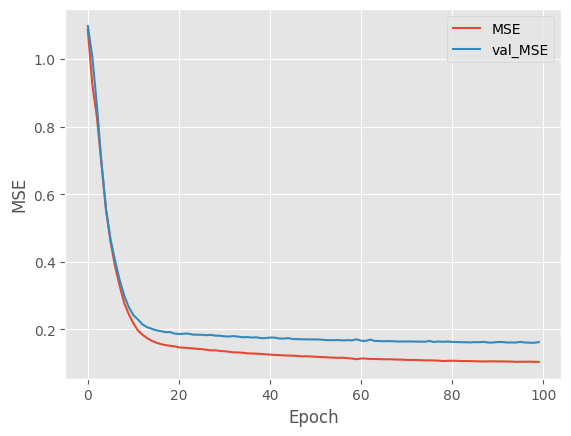

In [135]:
# Plot validation MSE
plt.plot(history.history["loss"], label="MSE")
plt.plot(history.history["val_loss"], label="val_MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(loc="best")
plt.show()

In [136]:
# Evaluate the model
y_pred_nn = nn_model.predict(X_nn_test)

nn_model.evaluate(X_nn_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1189


0.11891800165176392

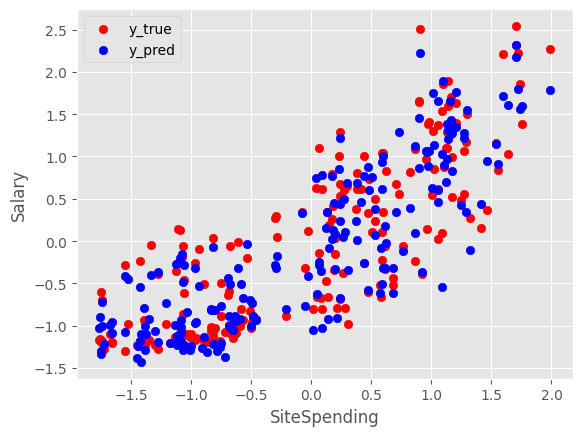

In [145]:
categorical_features = dataset.axes[1].values # ['Age', 'SiteSpending', 'SiteTime', 'RecommendImpression','Education', 'WorkType', 'Sex', 'Region']
n = 1
# Plot our predictions
plt.scatter(X_nn_test[:,n], Y_test,  color='red', label='y_true') # Observed y values
plt.scatter(X_nn_test[:,n], y_pred_nn, color='blue', label='y_pred') # predicted y values
plt.xlabel(categorical_features[n]) # X_test_raw
plt.ylabel('Salary')
plt.legend()
plt.show()

In [144]:
# Predict and new data and score prediction performance

print('R2 score: {:.2f}%'.format(r2_score(Y_test, y_pred_nn)*100))

R2 score: 87.97%


The plot for neural network model shows a positive correlation between the amount visitors spent on the website and the salary they earn. The same goes for amount of time spent vs salary.

The hyperparameter tunings experimented with for the NN models all performed acceptably with the following performance metrics: 

- Sigmoid score: 85%
- Relu score: 88%

Therefore, the `relu` activation function gave a better accuracy of 88%.

<!--  -->

# Part 6 - [KMeans Clustering](#sections-3---6-model-building)

k-means clustering is a method of vector quantization that aims to partition `n observations` into `k clusters` in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster ([Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)). It is a module from the `sklearn.cluster` library.


<br></br>

<u>Libraries used</u>
1. numpy - for array/numerical manipulation
2. matplotlib - for visualisation
3. pandas - for data analysis and manipulation
4. scikit-learn (sklearn) - for  metrics, encoding and building cluster model



In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

dataset.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,28,1986.92,70,3,A Level,Private sector,Male,Scotland,27447.26
1,34,4243.54,214,11,PhD,Private sector,Male,Yorkshire and The Humber,120044.00
2,51,3160.61,220,6,PhD,Private sector,Male,East of England,53133.79
3,27,1382.38,47,0,A Level,Private sector,Male,East of England,21874.01
4,24,1369.44,63,3,PhD,Unemployed,Female,North West,21222.03


At this state, the categorical features will be converted to numerical values using LabelEncoder() so we can have more features to work with

In [41]:
# create a copy of the original dataset
km_data = dataset

# Drop the binary feature on the last column
km_data["Above40k"] = dataset["Salary"] > 40000
X_km = km_data.drop(["Salary", "Above40k"], axis=1)
y_true_km = km_data["Above40k"]

X_km = pd.get_dummies(X_km, drop_first=True)


from sklearn.preprocessing import MinMaxScaler

# Scale parameters to have to keep values between 0 and 1
scaler = MinMaxScaler()
for feature in ["Age", "SiteSpending", "SiteTime", "RecommendImpression"]: # loop through features
    km_data[feature] = scaler.fit_transform(km_data[[feature]])



X_km.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education_Degree,Education_GCSE,Education_Masters,Education_None,Education_Other,Education_PhD,...,Region_London,Region_North East,Region_North West,Region_Northern Ireland,Region_Scotland,Region_South East,Region_South West,Region_Wales,Region_West Midlands,Region_Yorkshire and The Humber
0,0.140625,0.330337,0.126154,0.176471,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.234375,0.705621,0.569231,0.647059,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.500000,0.525526,0.587692,0.352941,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.125000,0.229800,0.055385,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.078125,0.227648,0.104615,0.176471,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### Elbow Method for Optimal Clusters
We find the optimal clusters by varying clusters from 1 to 7 and then plotting the result. The plot is WCSS vs. Clusters.

WCSS, which stands for `Within-Cluster Sum of Square`, is the sum of squared distance between each point and the centroid in a cluster. The WCSS values decrease as the clusters increase. Along the plot, there is a sharp change that represents an elbow. The point on clusters axis that corresponds to this elbow coordinate is the optimal cluster number.

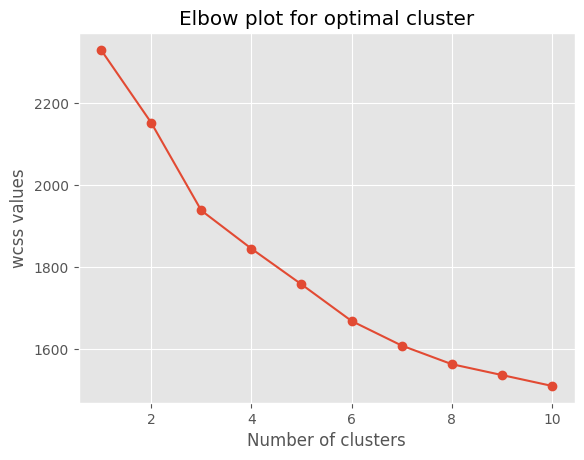

In [42]:
# Finding the optimal number of clusters using elbow method
wcss = [] # list to store Withing Cluster Sum of Squares
for i in range(1, 11):  # using 7 clusters
    km = KMeans(i, random_state=0, n_init="auto", init="k-means++").fit(X_km)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, "o-")
plt.title("Elbow plot for optimal cluster")
plt.xlabel("Number of clusters")
plt.ylabel("wcss values")
plt.show()


The plot above suggests the optimal number of clusters to be 3. However, I will be using 2 clusters as we are dealing with binary classification. This will be confirmed with accuracy, 2 clusters performed better than 3 clusters.

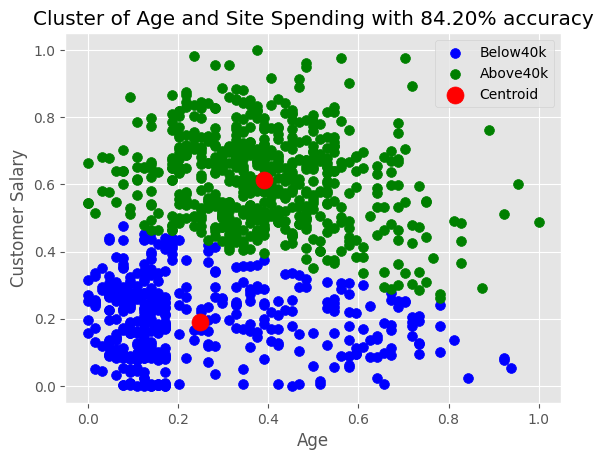

In [66]:
# Split data into training and testing data
# X_km = km_data.drop(["Salary", "Above40k"], axis=1)
# y_true_km = km_data["Above40k"]

np.random.seed(10)

# create a KMeans instance
km_model = KMeans(n_clusters=2, init="k-means++", n_init="auto")

# Prepare numpy arrays for X_km, train and get centroids
X_km = np.array(X_km)[:, :2]  # using two features
y_pred_Km = km_model.fit_predict(X_km)
centroid = km_model.cluster_centers_



# Plot clusters
fig, ax = plt.subplots()
ax.scatter(x=X_km[y_pred_Km==0,0], y=X_km[y_pred_Km==0,1], s=50, c=["blue"], label="Below40k")
ax.scatter(x=X_km[y_pred_Km==1,0], y=X_km[y_pred_Km==1,1], s=50, c=["green"], label="Above40k")

ax.scatter(x=centroid[:, 0], y=centroid[:, 1], c=["red"], s=150, label="Centroid")
ax.set(
    title=f"Cluster of Age and Site Spending with {accuracy_score(y_pred_Km, y_true_km) * 100:.2f}% accuracy",
    xlabel="Age",
    ylabel="Customer Salary")
ax.legend(loc="best");

In [62]:
# Print Accuracy
print(f"KMeans Accuracy: {accuracy_score(y_pred_Km, y_true_km)*100:.2f}")

KMeans Accuracy: 84.20


The KMEans clustering algorithm also performed to satisfaction, grouping our customers into two clusters. The number of clusters, `n_clusters`, was varied, a `random_state of 10` was maintained, `k-means++ initializer` was used and the following results were achieved:

- Accuracy for 2 clusters: 84.20%
- Accuracy for 3 clusters: 61.30%
- Accuracy for 4 clusters: 33.00%

As stated earlier, 2 clusters perfromed better than the 3 clusters the elbow method suggested. So our final accuracy for KMeans clustering is 84%.

# Part 7 - [Conclusion](#section-7-conclusion)


Various algoritmic experiments have been carried out on the customer data. All models performed excellently well and any can be implemented to either classify or predict salaries of visitors to our website. Parameters were tuned and retuned, data was shuffled, diffent random seeds were tested. 


As a summary, the perfomance of each of the models is tabulated below.

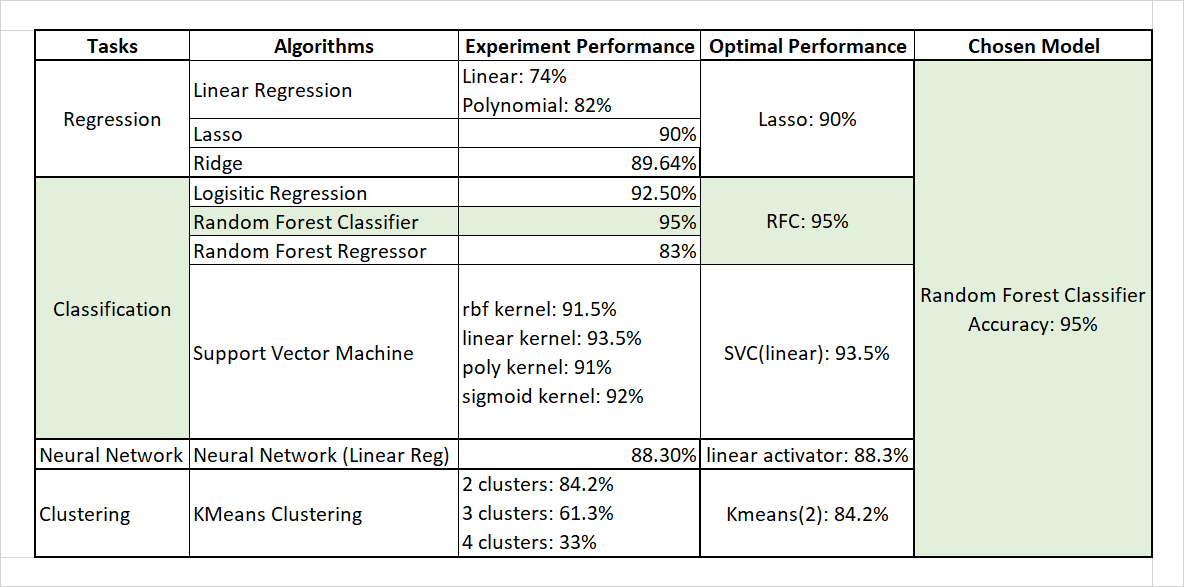

After carefully experimenting with all 4 models - Linear Regression, Binary Classfication, Artificial Neural Network, and KMeans Clustering, the recommended model for depolyment is the Binary Classification using the `RandomForestClassifier` from the `sklearn.ensemble` library. It is recommended based on it 95% score.


## References

- Dr. Peter Soar Lecture Note and Labs: COMP-1801-M01-2022-23 Machine Learning. Available at https://moodlecurrent.gre.ac.uk/course/view.php?id=80962 (Accessed: September - December, 2022)

- Wikipedia: Confusion Matrix: Available at https://en.wikipedia.org/wiki/Confusion_matrix. (Accessed: 26 January 2023)

- IBM: What is machine learning?: Available at https://www.ibm.com/topics/machine-learning. (Accessed: 02 January 2023)

- University of Washington Computer Science Department: Neural Network: Available at http://faculty.washington.edu/otoomet/machinelearning-py/neural-networks.html (Accessed: 23 January 2023)

- Anuganti Suresh: Confusion Matrix: Available at https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5. (Accessed: 08 January 2023)